In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True) # 숫자 프린팅 옵션 설정

data = np.loadtxt("house_prices.txt",delimiter=",")

In [2]:
# 데이터 확인
data

array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.],
       [  1985.,      4., 299900.],
       [  1534.,      3., 314900.],
       [  1427.,      3., 198999.],
       [  1380.,      3., 212000.],
       [  1494.,      3., 242500.],
       [  1940.,      4., 239999.],
       [  2000.,      3., 347000.],
       [  1890.,      3., 329999.],
       [  4478.,      5., 699900.],
       [  1268.,      3., 259900.],
       [  2300.,      4., 449900.],
       [  1320.,      2., 299900.],
       [  1236.,      3., 199900.],
       [  2609.,      4., 499998.],
       [  3031.,      4., 599000.],
       [  1767.,      3., 252900.],
       [  1888.,      2., 255000.],
       [  1604.,      3., 242900.],
       [  1962.,      4., 259900.],
       [  3890.,      3., 573900.],
       [  1100.,      3., 249900.],
       [  1458.,      3., 464500.],
       [  2526.,      3., 46

In [3]:
# 데이터 일부 확인 (5개 행, 모든열)
data[:5,:]

array([[  2104.,      3., 399900.],
       [  1600.,      3., 329900.],
       [  2400.,      3., 369000.],
       [  1416.,      2., 232000.],
       [  3000.,      4., 539900.]])

In [4]:
# 데이터셋을 X와 Y로 분리
X = data[:,:2]  # 모든 행, 첫 열(index 0인 열)부터 index 2인 열 직전까지
Y = data[:,-1] # 모든 행, 마지막 열 => Y = data[:,2] 이것과 동일

In [5]:
# 데이터를 학습 데이터와 테스트 데이터로 분리
# [option] test_size: 테스트 데이터 비중, random_state: (아무)숫자를 입력하여 랜덤으로 선택되는 데이터 고정
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

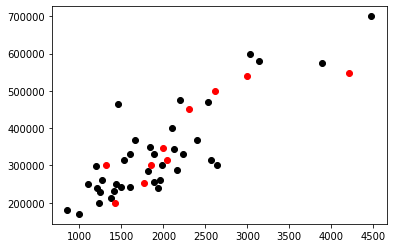

In [6]:
# 학습 데이터를 그래프에 표시
plt.scatter(X_train[:,0], Y_train, color='black')
# 테스트 데이터를 그래프에 표시
plt.scatter(X_test[:,0], Y_test, color='red')

In [7]:
# 선형회귀 모델 선언
model = linear_model.LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
# 테스트 데이터를 모델에 넣어 결과 예측
result = model.predict(X_test)

In [9]:
# 실제 가격과 예측한 가격 비교
print(np.column_stack((X_test, Y_test, result)))


[[  2040.              4.         314900.         334034.51140902]
 [  1852.              4.         299900.         307034.8009262 ]
 [  3000.              4.         539900.         471905.37344899]
 [  2300.              4.         449900.         371374.53654485]
 [  4215.              4.         549000.         646398.18321832]
 [  1767.              3.         252900.         308328.1750883 ]
 [  1320.              2.         299900.         257632.74502283]
 [  1427.              3.         198999.         259498.91144914]
 [  2609.              4.         499998.         415751.72026396]
 [  2000.              3.         347000.         341790.58222925]]


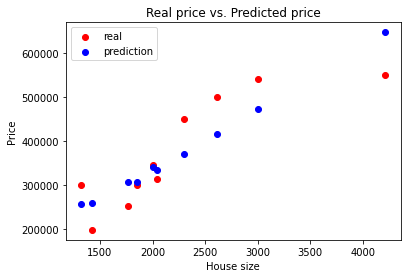

In [10]:
# 실제 가격과 예측한 가격 plot - X 데이터 중 집크기가 x축, 가격이 y축
real = plt.scatter(X_test[:,0], Y_test,  color='red')   # 실제 가격
predict = plt.scatter(X_test[:,0], result, color='blue')  # 예측한 가격
plt.legend((real, predict), ('real', 'prediction'))
plt.title('Real price vs. Predicted price')
plt.ylabel('Price')
plt.xlabel('House size')
plt.show()

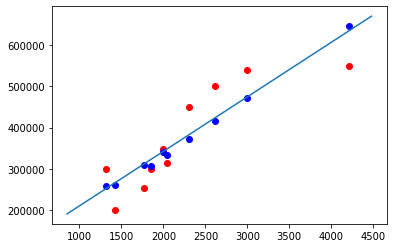

In [11]:
# 학습된 선형 모델 plot
plt.plot([min(X_train[:,0]), max(X_train[:,0]) ], 
         [min(model.predict(X_train)), max(model.predict(X_train))])
# 예측한 결과 plot
plt.scatter(X_test[:,0], Y_test,  color='red')   # 실제 결과
plt.scatter(X_test[:,0], result, color='blue')  # 예측한 결과
